## Dry Bean Type Prediction





In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import scipy.stats as stats
warnings.filterwarnings("ignore")

# For statistical test
from scipy.stats import chisquare, chi2_contingency ## Stastical test
from scipy.stats import probplot
from scipy import stats
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


# Machine learning libary
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, precision_recall_fscore_support,roc_curve

# Data Understanding & Preprocessing

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_excel("/content/drive/MyDrive/Dry Bean Classification/Dry_Bean_Dataset.xlsx")

### Data Dimension

In [4]:
data.shape

(13611, 17)

The dataset contains:
*   13611 rows of data
*   17 different columns

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,13611.0,53048.284549,29324.095717,20420.000000,36328.000000,44652.000000,61332.000000,254616.000000
Perimeter,13611.0,855.283459,214.289696,524.736000,703.523500,794.941000,977.213000,1985.370000
MajorAxisLength,13611.0,320.141867,85.694186,183.601165,253.303633,296.883367,376.495012,738.860153
MinorAxisLength,13611.0,202.270714,44.970091,122.512653,175.848170,192.431733,217.031741,460.198497
AspectRation,13611.0,1.583242,0.246678,1.024868,1.432307,1.551124,1.707109,2.430306
Eccentricity,13611.0,0.750895,0.092002,0.218951,0.715928,0.764441,0.810466,0.911423
ConvexArea,13611.0,53768.200206,29774.915817,20684.000000,36714.500000,45178.000000,62294.000000,263261.000000
EquivDiameter,13611.0,253.064220,59.177120,161.243764,215.068003,238.438026,279.446467,569.374358
Extent,13611.0,0.749733,0.049086,0.555315,0.718634,0.759859,0.786851,0.866195
Solidity,13611.0,0.987143,0.004660,0.919246,0.985670,0.988283,0.990013,0.994677


### Missing data

In [7]:
data.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [8]:
data.isnull().sum().any()

False

The dataset contain no missing data

### Data duplication

In [9]:
duplicates = data[data.duplicated()]
print("Duplicate Rows : ",len(duplicates))
duplicates.head()

Duplicate Rows :  68


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
5505,33518,702.956,277.571399,154.305581,1.798842,0.831240,34023,206.582775,0.808383,0.985157,0.852377,0.744251,0.008281,0.001567,0.553909,0.996396,HOROZ
5509,33954,716.750,277.368480,156.356326,1.773951,0.825970,34420,207.922042,0.799482,0.986461,0.830549,0.749624,0.008169,0.001591,0.561936,0.996847,HOROZ
5548,38427,756.323,306.533886,160.591784,1.908777,0.851782,38773,221.193978,0.796976,0.991076,0.844174,0.721597,0.007977,0.001334,0.520702,0.993905,HOROZ
5554,38891,791.343,319.499996,156.869619,2.036723,0.871168,39651,222.525412,0.650025,0.980833,0.780422,0.696480,0.008215,0.001192,0.485085,0.987983,HOROZ
5599,40804,790.802,323.475648,163.287717,1.981016,0.863241,41636,227.932592,0.787570,0.980017,0.819931,0.704636,0.007928,0.001206,0.496512,0.983598,HOROZ


In [10]:
data.drop_duplicates(inplace = True)

There are 68 duplicated rows, all duplicated rows were removed.

In [11]:
data.shape

(13543, 17)

The new dimension of dataset have 13543 rows and 17 columns

## Unique value

In [12]:
def v_counts(dataframe):
    for i in dataframe :
        print(dataframe[i].value_counts())
        print("_____________________________________________________________________________")

v_counts(data)

34594    4
36109    4
52266    4
29709    4
28122    4
        ..
73969    1
73973    1
74034    1
74044    1
42159    1
Name: Area, Length: 12011, dtype: int64
_____________________________________________________________________________
683.341     3
968.674     2
670.479     2
800.405     2
687.923     2
           ..
1041.011    1
1017.763    1
1037.806    1
1034.771    1
772.237     1
Name: Perimeter, Length: 13416, dtype: int64
_____________________________________________________________________________
208.178117    1
299.536352    1
301.858498    1
303.248379    1
294.946255    1
             ..
427.220651    1
402.000670    1
412.245965    1
406.680186    1
295.142741    1
Name: MajorAxisLength, Length: 13543, dtype: int64
_____________________________________________________________________________
173.888747    1
197.308325    1
195.156389    1
194.386687    1
199.788011    1
             ..
217.619608    1
232.230331    1
226.372175    1
231.087063    1
182.204716    1
Nam

## Univariate Analysis

### Data distribution for independent varibiables.

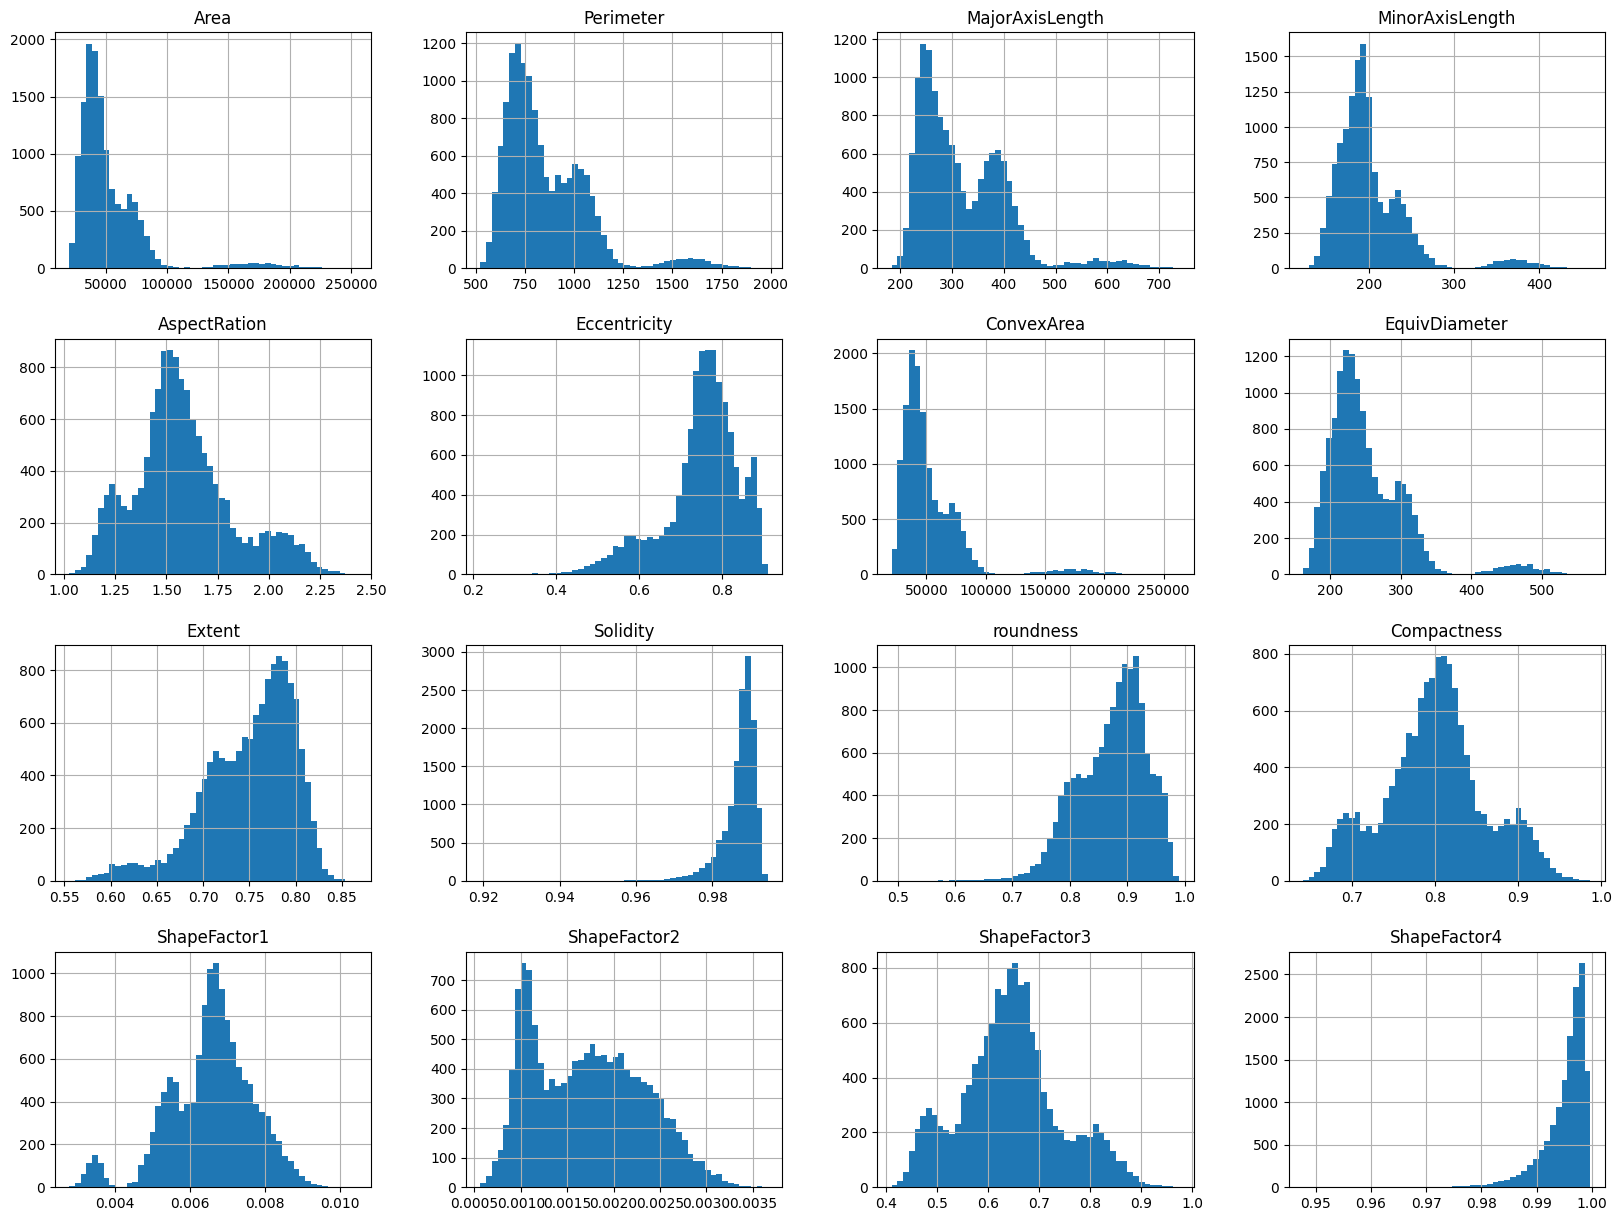

In [13]:
data.hist(bins=50, figsize=(20,15))
plt.show()

### Data distribution for dependent variable

In [14]:
data['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1860
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

In [15]:
count_data = data['Class'].value_counts()

In [16]:
count_dat = list(count_data)

In [17]:
key_dat = list(count_data.keys())

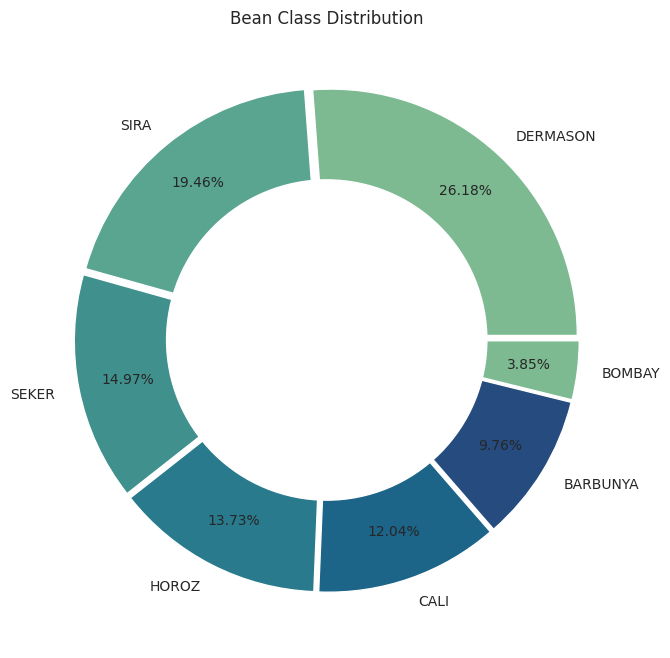

In [18]:
#Distribution of class variables and sample size

sns.set_style("whitegrid")
palette_color = sns.color_palette('crest')
plt.figure(figsize=(8, 8))
plt.pie(count_dat, labels=key_dat, colors=palette_color, autopct='%1.2f%%', pctdistance=0.80, explode=[0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025])
plt.title("Bean Class Distribution")
hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.show()

Dataset is unbalance, where majority class is Dermason while minority class is Bombay.

## Outlier Analysis

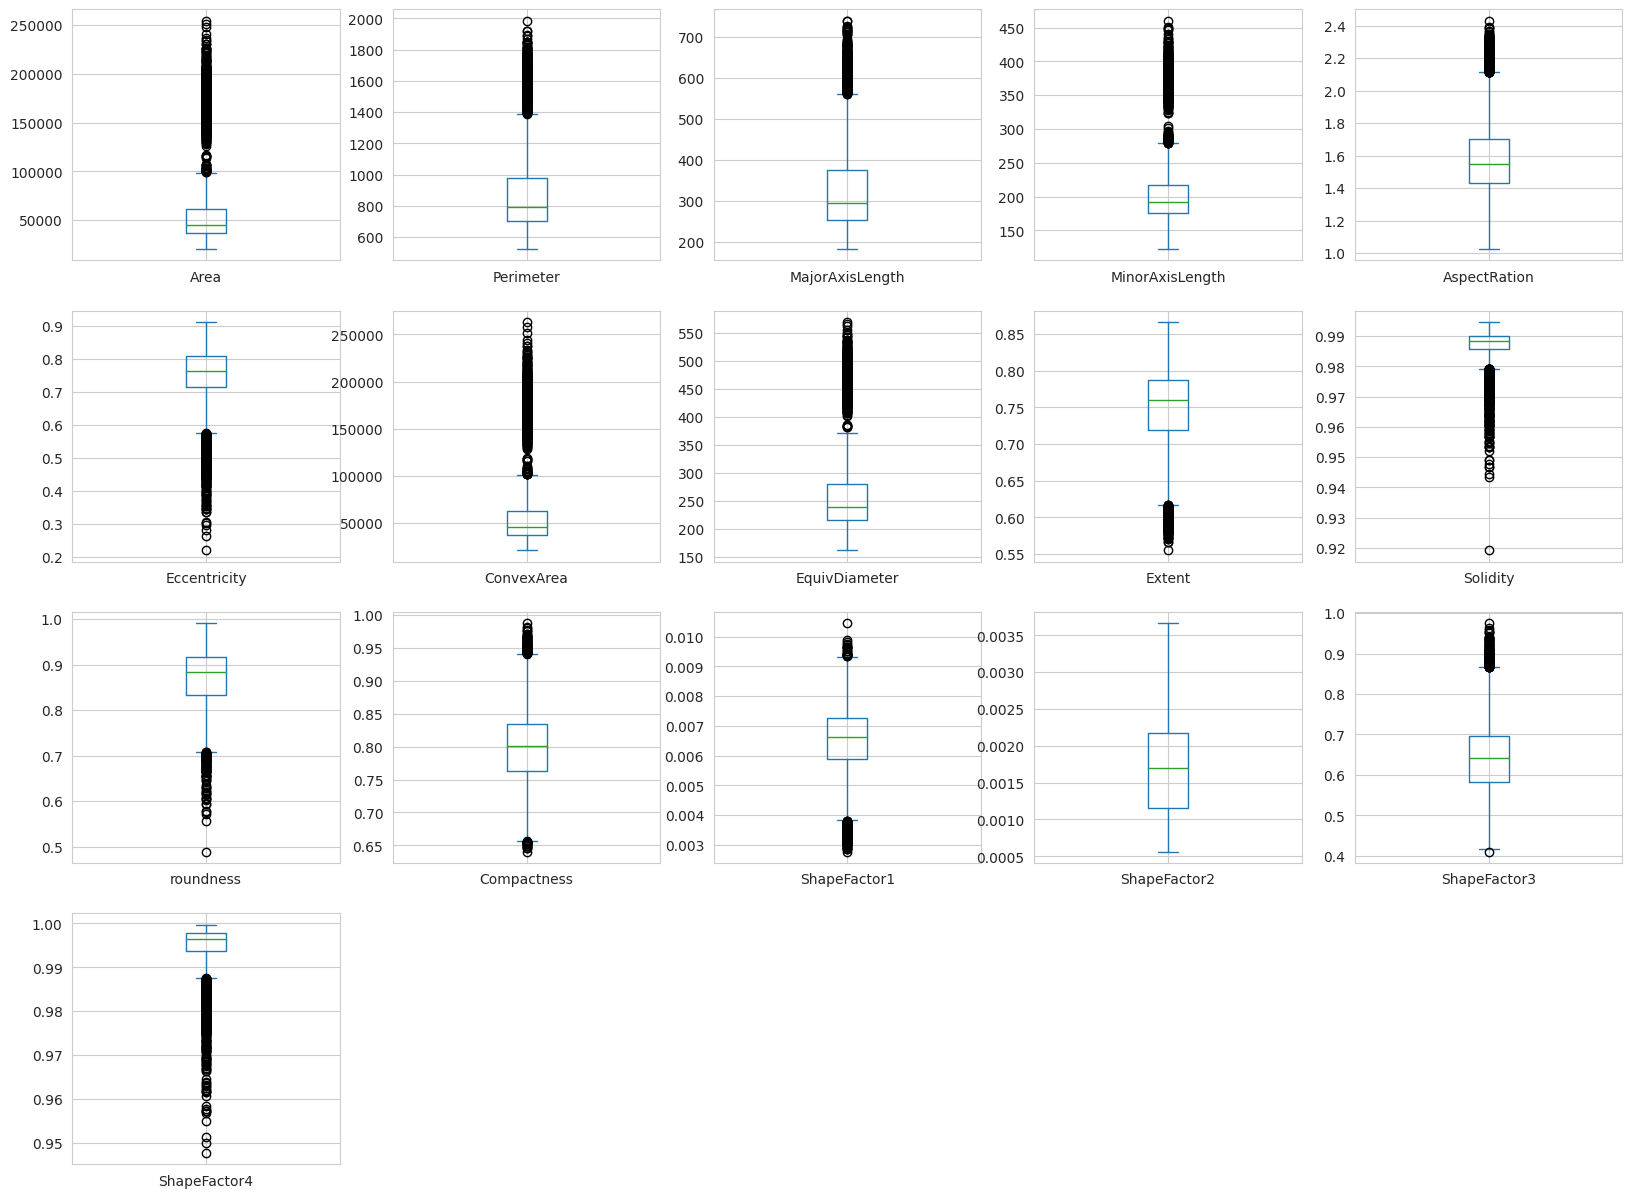

In [19]:
#Boxplot of each feature
#Observe the distribution and outliers

data.plot(kind='box', subplots=True, layout=(4,5), figsize=(20,15))
plt.show()

In [20]:
def detect_outliers(data, columns, threshold=3):
    outliers = []
    for column in columns:
        mean = np.mean(data[column])
        std = np.std(data[column])
        lower_limit = mean - (std * threshold)
        upper_limit = mean + (std * threshold)
        outliers.extend(data[(data[column] < lower_limit) | (data[column] > upper_limit)].index)
    return outliers

columns_to_check = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength','AspectRation','Eccentricity','ConvexArea','EquivDiameter','Extent','Solidity','roundness','Compactness','ShapeFactor1','ShapeFactor2','ShapeFactor3','ShapeFactor4']

# Detecting outliers
outliers = detect_outliers(data, columns_to_check)
data_out = data.drop(outliers)

In [21]:
data_out.shape

(12414, 17)

In [22]:
outliers_count = data.shape[0] - data_out.shape[0]
outliers_count

1129

In [23]:
data_out['Class'].value_counts()

DERMASON    3520
SIRA        2623
SEKER       1896
HOROZ       1562
CALI        1543
BARBUNYA    1259
BOMBAY        11
Name: Class, dtype: int64

In [24]:
data['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1860
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

There are 1129 outliers data. Most of outliers come from minority class which is Bombay. Since removing outliers reduced the data further. So far, we keep all the outliers, if the models is low accuracy or overfitting, we will remove the outliers, otherwise, we simply ignored it.

## Multivariate Analysis

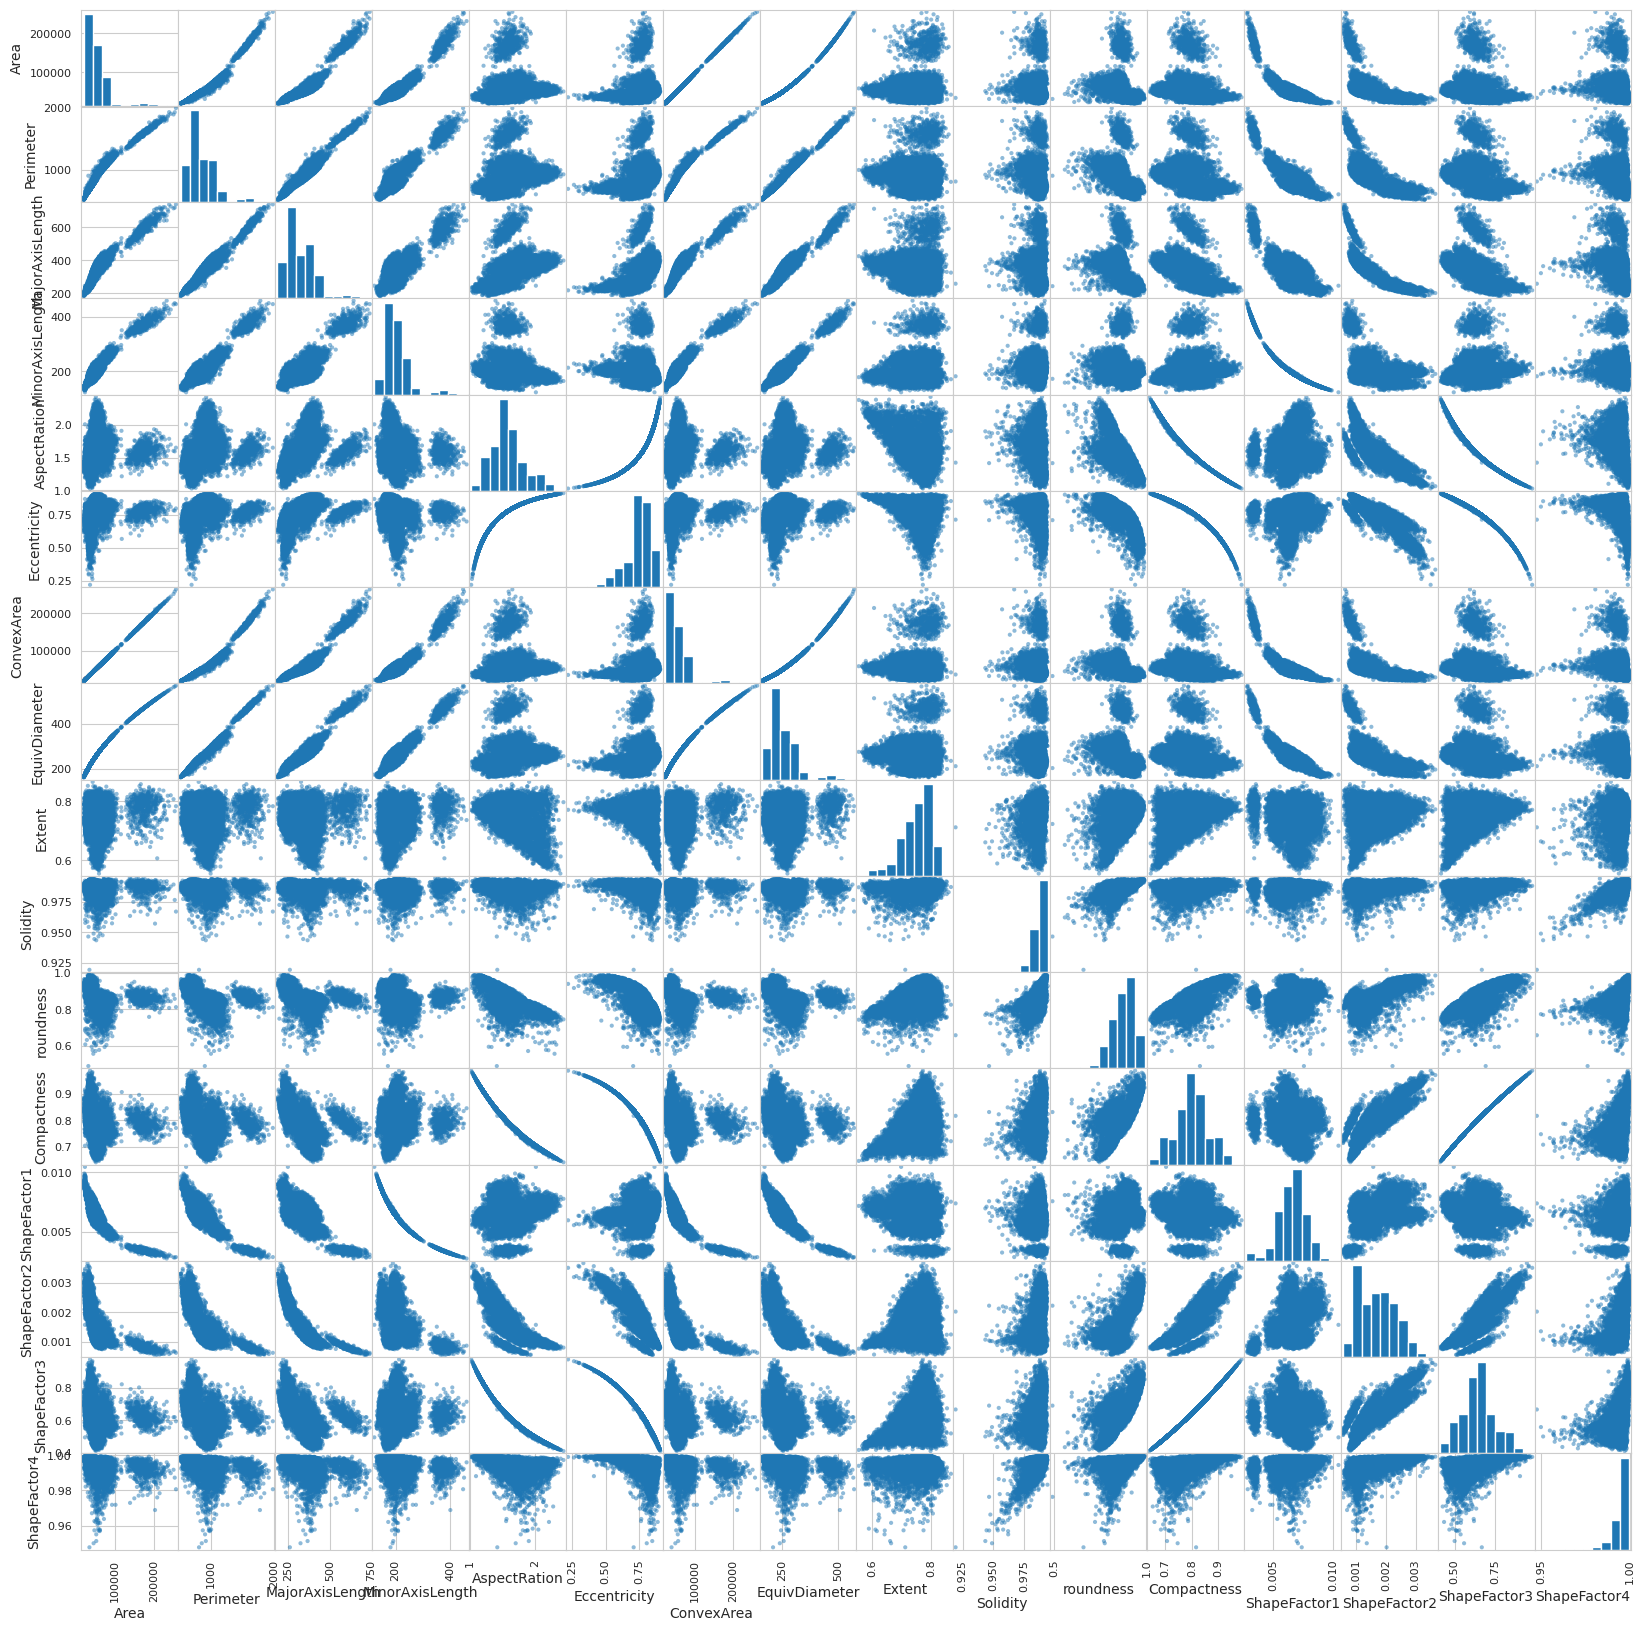

In [25]:
#The scatter plot matrix between each variable in the data set.

#Observe linear or nonlinear relationships between variables and possible outliers or clustering

pd.plotting.scatter_matrix(data, figsize=(20, 20))
plt.show()

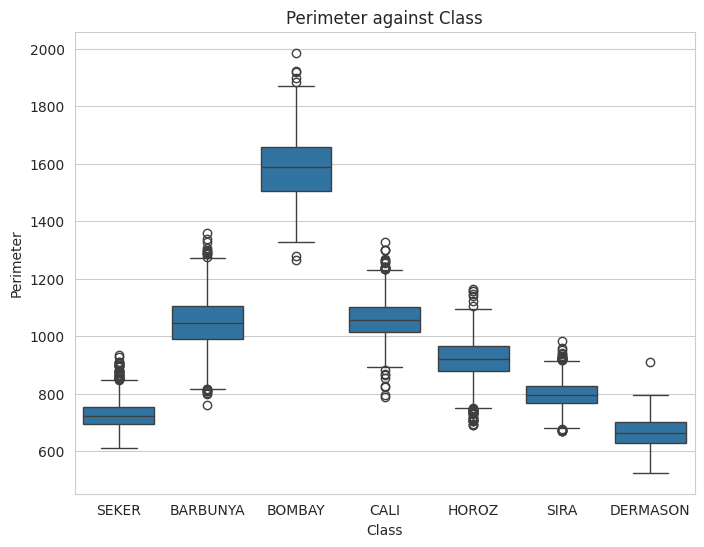

In [26]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y="Perimeter", data=data)
plt.xlabel('Class')
plt.ylabel("Perimeter")
plt.title("Perimeter against Class")
plt.show()

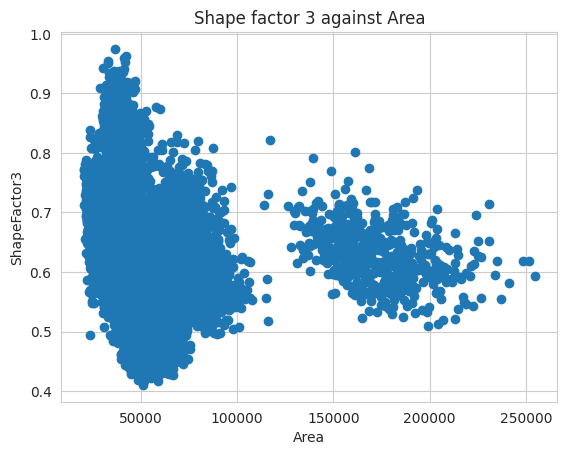

In [27]:
# scatter diagram
plt.scatter(data['Area'], data['ShapeFactor3'])
plt.xlabel('Area')
plt.ylabel('ShapeFactor3')
plt.title("Shape factor 3 against Area")
plt.show()

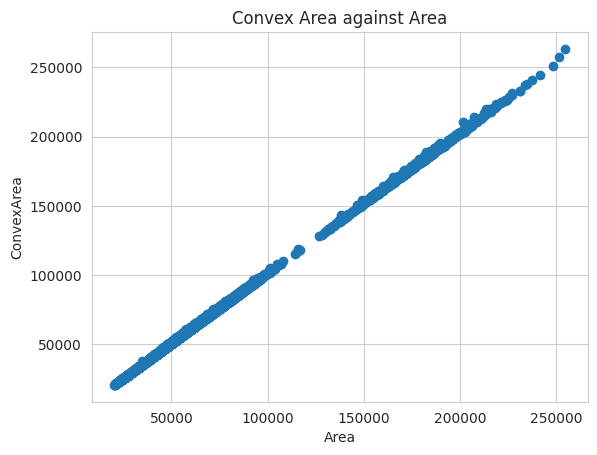

In [28]:
# scatter diagram
plt.scatter(data['Area'], data['ConvexArea'])
plt.xlabel('Area')
plt.ylabel('ConvexArea')
plt.title("Convex Area against Area")
plt.show()

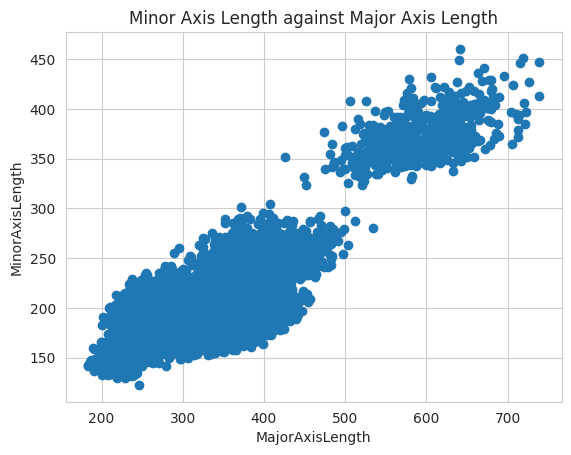

In [29]:
# scatter diagram
plt.scatter(data['MajorAxisLength'], data['MinorAxisLength'])
plt.xlabel('MajorAxisLength')
plt.ylabel('MinorAxisLength')
plt.title("Minor Axis Length against Major Axis Length")
plt.show()

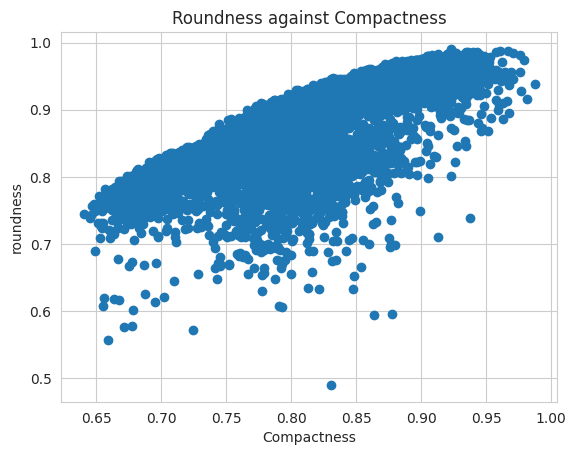

In [30]:
# scatter diagram
plt.scatter(data['Compactness'], data['roundness'])
plt.xlabel('Compactness')
plt.ylabel('roundness')
plt.title("Roundness against Compactness")
plt.show()

## Data encoding

In [31]:
data_deploy = data.copy()

In [32]:
data['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1860
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

In [33]:
from sklearn.preprocessing import LabelEncoder
l1=LabelEncoder()
data["Class"]=l1.fit_transform(data["Class"])


In [34]:
data['Class'].value_counts()

3    3546
6    2636
5    2027
4    1860
2    1630
0    1322
1     522
Name: Class, dtype: int64

## Correlation Analysis

In [35]:
corr_data = []

for i in data.columns:
  for j in data.columns:
    corr_data.append([i, j, data.corr()[i][j]])


In [36]:
data.corr()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
Area,1.000000,0.966908,0.932623,0.952041,0.243698,0.268580,0.999940,0.984998,0.054648,-0.197333,-0.359068,-0.269797,-0.848390,-0.641208,-0.273754,-0.358019,-0.475413
Perimeter,0.966908,1.000000,0.977561,0.914336,0.386097,0.391062,0.967871,0.991453,-0.020620,-0.304662,-0.548336,-0.407426,-0.865756,-0.768590,-0.408888,-0.431215,-0.508315
MajorAxisLength,0.932623,0.977561,1.000000,0.828360,0.550075,0.541011,0.933392,0.962271,-0.077287,-0.284857,-0.595710,-0.567902,-0.775840,-0.859401,-0.567607,-0.484464,-0.456515
MinorAxisLength,0.952041,0.914336,0.828360,1.000000,-0.005354,0.022391,0.951780,0.949214,0.145906,-0.156819,-0.214090,-0.018618,-0.947194,-0.475326,-0.022744,-0.266402,-0.458347
AspectRation,0.243698,0.386097,0.550075,-0.005354,1.000000,0.924185,0.245267,0.305237,-0.371234,-0.269110,-0.764975,-0.987644,0.020875,-0.837338,-0.978528,-0.451598,-0.119588
Eccentricity,0.268580,0.391062,0.541011,0.022391,0.924185,1.000000,0.270350,0.319360,-0.319678,-0.298282,-0.720138,-0.970308,0.017266,-0.859246,-0.981058,-0.450611,-0.202824
ConvexArea,0.999940,0.967871,0.933392,0.951780,0.245267,0.270350,1.000000,0.985255,0.052864,-0.206901,-0.363620,-0.271651,-0.848382,-0.642773,-0.275631,-0.364302,-0.477624
EquivDiameter,0.984998,0.991453,0.962271,0.949214,0.305237,0.319360,0.985255,1.000000,0.028762,-0.232344,-0.437189,-0.328980,-0.893403,-0.714693,-0.331594,-0.394693,-0.481452
Extent,0.054648,-0.020620,-0.077287,0.145906,-0.371234,-0.319678,0.052864,0.028762,1.000000,0.192268,0.344510,0.354912,-0.141525,0.237584,0.348226,0.148622,-0.030855
Solidity,-0.197333,-0.304662,-0.284857,-0.156819,-0.269110,-0.298282,-0.206901,-0.232344,0.192268,1.000000,0.609668,0.304802,0.154346,0.344337,0.308614,0.700150,0.323356


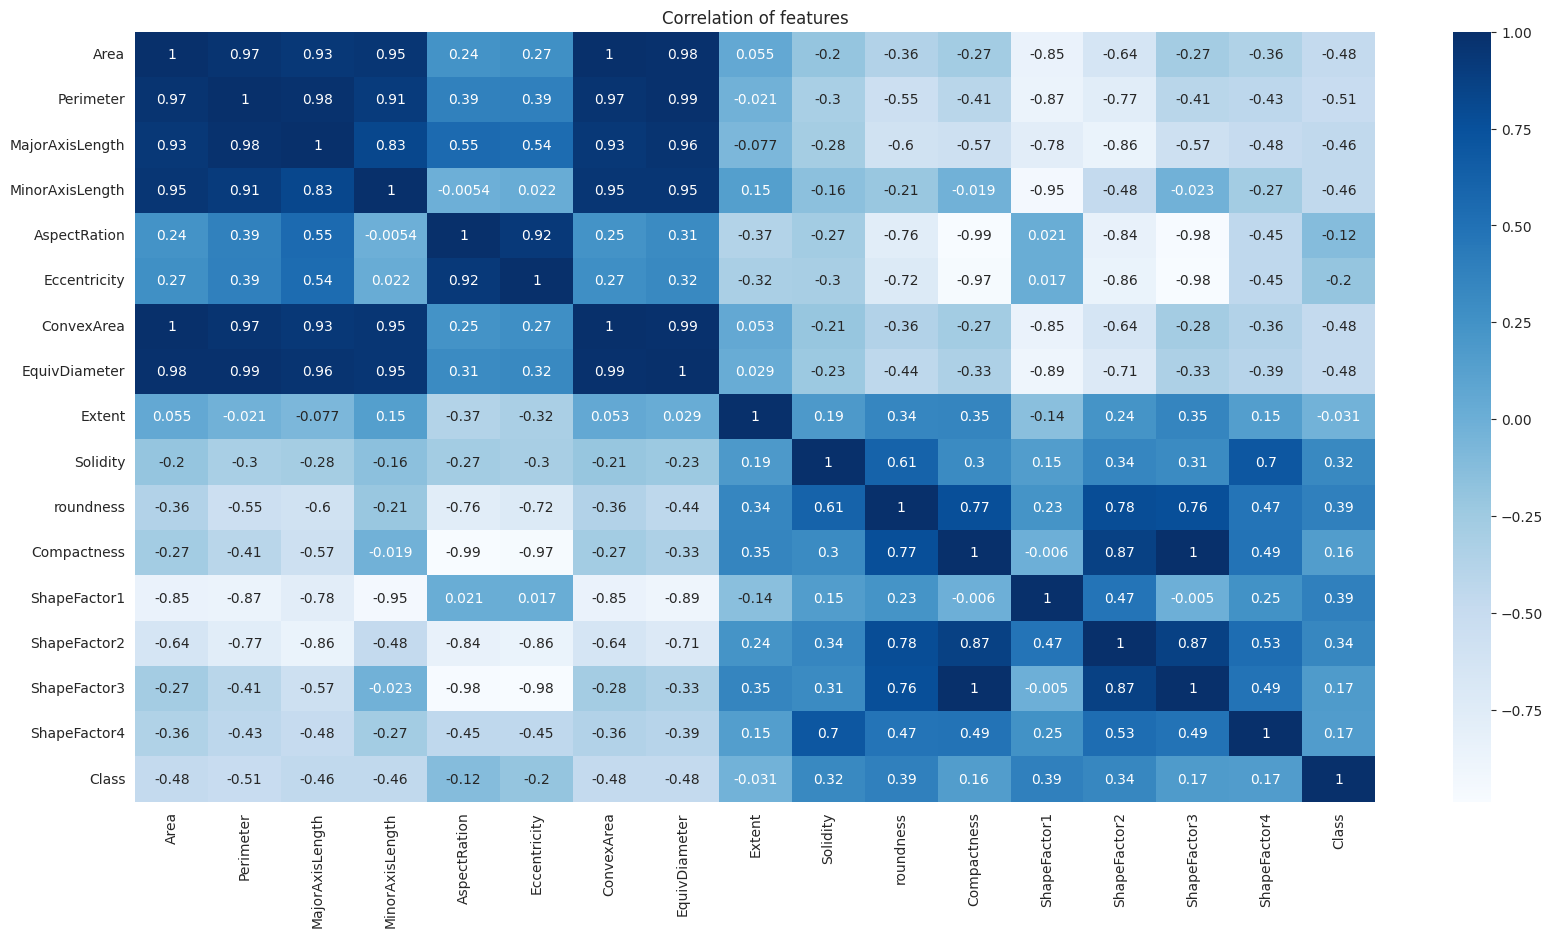

In [37]:
plt.figure(figsize=(20,10))

sns.heatmap(data.corr(),annot=True , cmap ='Blues')
plt.title("Correlation of features")
plt.show()

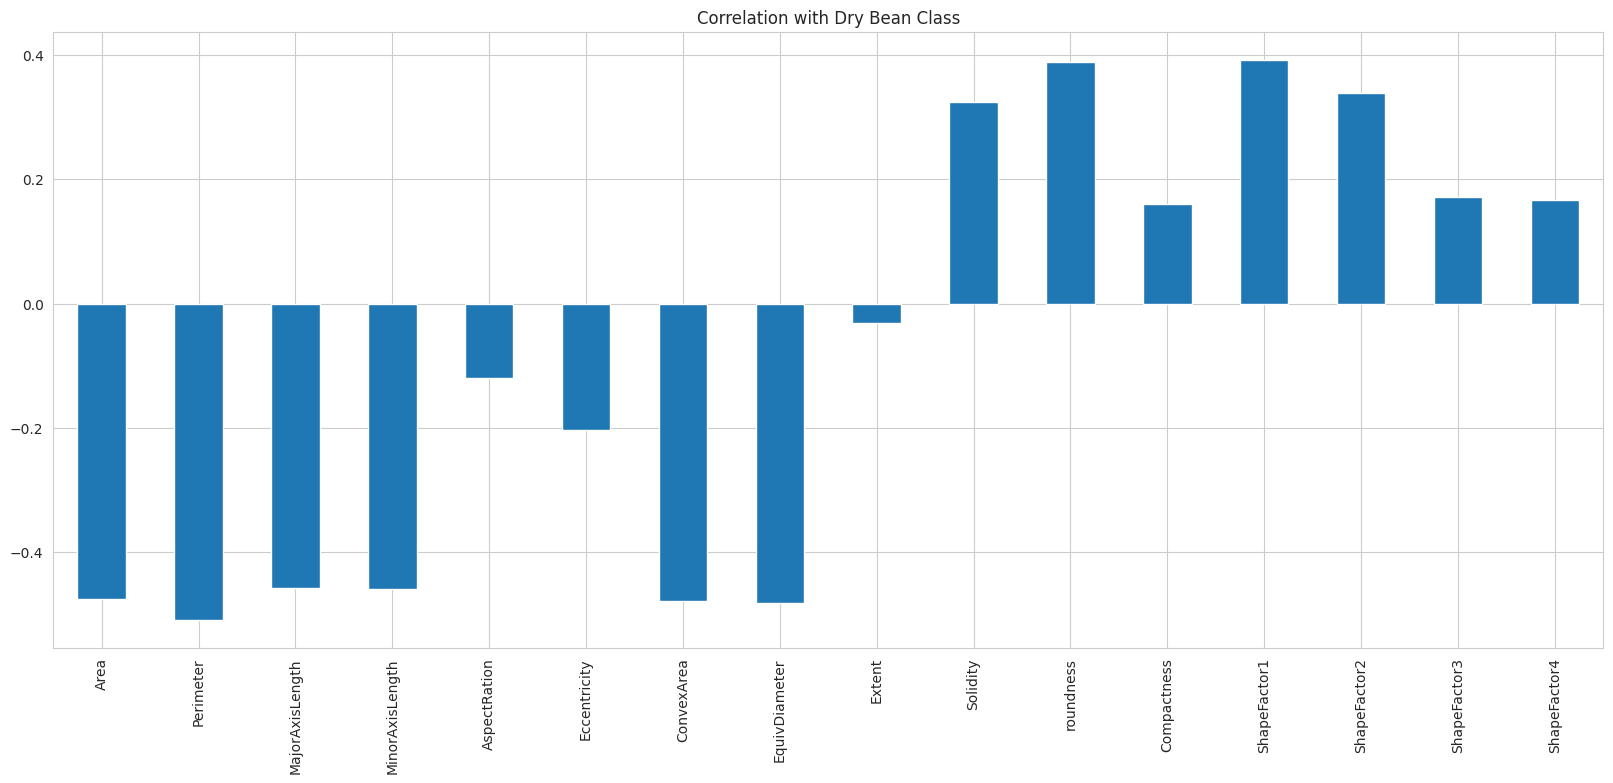

In [38]:
data.drop('Class', axis=1).corrwith(data.Class).plot(kind='bar', grid=True, figsize=(20, 8)
, title="Correlation with Dry Bean Class");

Extent, Eccentricity, AspectRation, Compactness, ShapeFactor3, ShapeFactor4 are less correlated with Class.

## Data scaling and splitting

In [39]:
import random
random.seed(10)

In [40]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.utils import to_categorical

X = data.drop('Class', axis=1)
Y = data['Class']

scaler = MinMaxScaler() #better
# scaler = StandardScaler()
# scaler = MaxAbsScaler()
X = scaler.fit_transform(X)
X

array([[0.03405267, 0.05857388, 0.04426214, ..., 0.83304879, 0.75099637,
        0.98061988],
       [0.03550018, 0.07755673, 0.03047881, ..., 0.96731548, 0.88498696,
        0.97497943],
       [0.03825855, 0.06803484, 0.05263303, ..., 0.80094229, 0.7361995 ,
        0.98719587],
       ...,
       [0.09273856, 0.16060492, 0.17638393, ..., 0.42701895, 0.4722397 ,
        0.9430251 ],
       [0.09277272, 0.16365701, 0.17970258, ..., 0.41532999, 0.45691893,
        0.91334231],
       [0.09282396, 0.16944765, 0.20088207, ..., 0.34689166, 0.36476185,
        0.9701623 ]])

The data gets split into features (X) and labels (Y), where 'Class' most likely represents the type of bean. Then, MinMaxScaler from the sklearn library normalizes the feature data. This normalization ensures all bean characteristics have a uniform scale, which optimizes the performance of subsequent machine learning models.


## Data upsampling

In [41]:

from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

X = pd.DataFrame(X, columns=data.drop('Class', axis=1).columns)
X.shape

(24822, 16)

In [42]:
Y.value_counts()

5    3546
0    3546
1    3546
2    3546
4    3546
6    3546
3    3546
Name: Class, dtype: int64

Data now has 24822 rows and 16 columns for X data (One column is split to Y data). All class now balance.

## Feature Selection

In [43]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Anova feature selection
# feature selection using anova
# fs = SelectKBest(score_func=f_classif, k=10)
# apply feature selection
# X = fs.fit_transform(X, Y)

# Kendall Feature Selection
# data_corr = data.copy()
# cor = data_corr.corr(method='kendall')
# cor_target = abs(cor["Class"])
# Selecting highly correlated features
# Kendall_features = cor_target[cor_target>=0.2]
# Kendall_features

# X = data_corr[Kendall_features.index.drop('Class')]
# Y = data_corr['Class']


# PCA
# from sklearn.decomposition import PCA
# pca = PCA(n_components=8)
# principalComponents = pca.fit_transform(X)
# X = pd.DataFrame(data = principalComponents
#             , columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8'])

No feature selection since feature selection reducing accuracy of models.

## Data Splitting

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.1, random_state = 42)

# Data Modelling

## Modelling and fitting analysis for classical machine learning

In [45]:
models = [LogisticRegression(),
         SVC(),
         GaussianNB(),
         KNeighborsClassifier(),
         ExtraTreeClassifier(),
         RandomForestClassifier(),
         DecisionTreeClassifier(),
         LGBMClassifier(),
         XGBClassifier()
         ]

names = ['LogisticRegression',
         'SVM',
         'GuassianNaiveBayes',
         'K-NN',
         'ExtraTree',
         'RandomForest',
         'DecisionTree',
         'Lightgbm',
         'Xgboost'
         ]


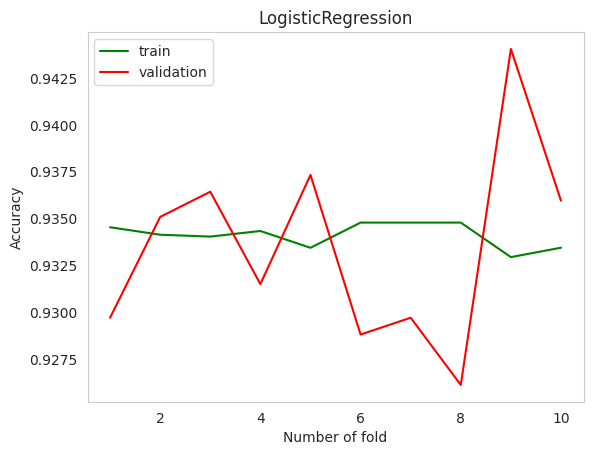

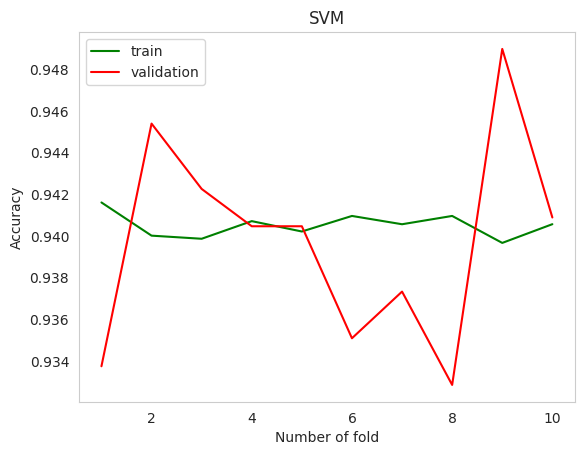

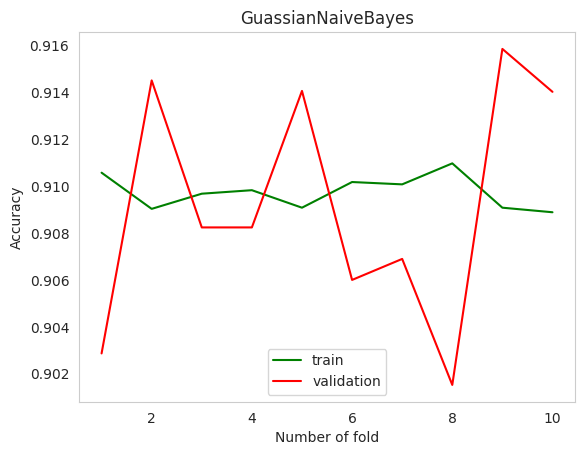

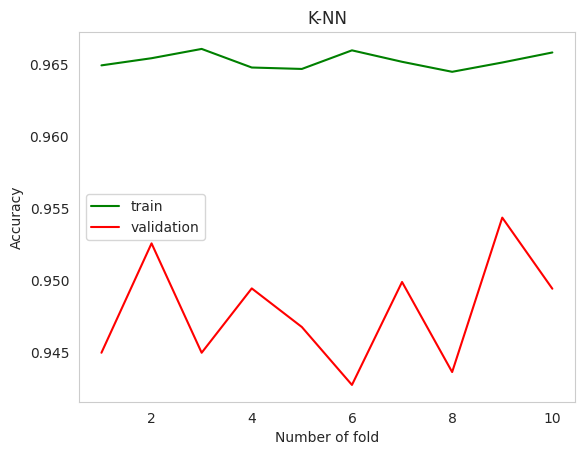

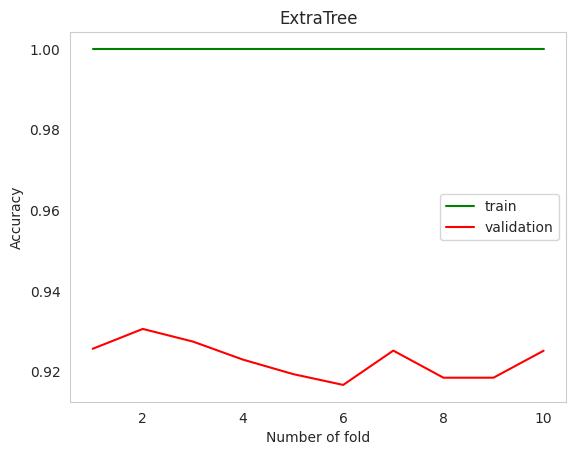

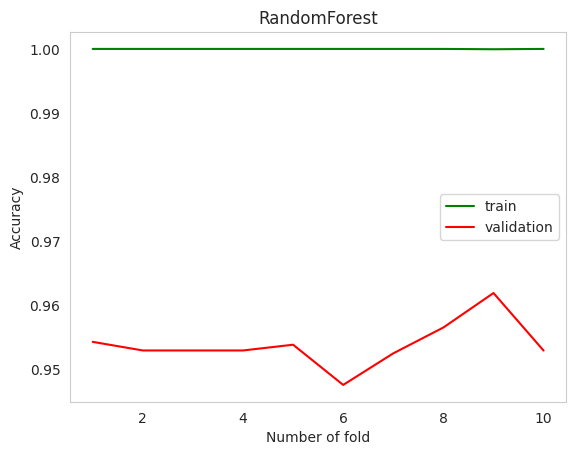

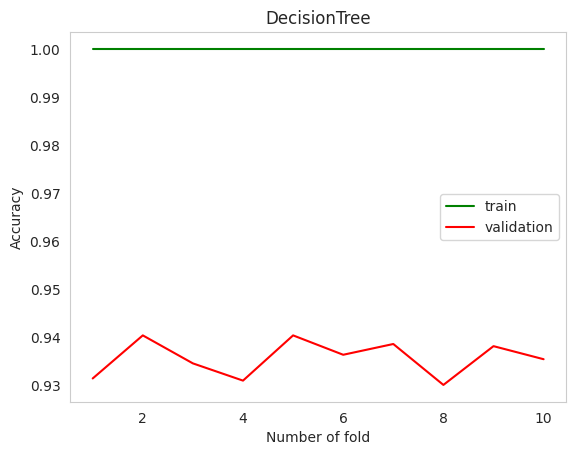

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003412 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 20105, number of used features: 16
[LightGBM] [Info] Start training from score -1.950846
[LightGBM] [Info] Start training from score -1.943873
[LightGBM] [Info] Start training from score -1.945264
[LightGBM] [Info] Start training from score -1.945612
[LightGBM] [Info] Start training from score -1.949448
[LightGBM] [Info] Start training from score -1.941444
[LightGBM] [Info] Start training from score -1.944916
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003282 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 2010

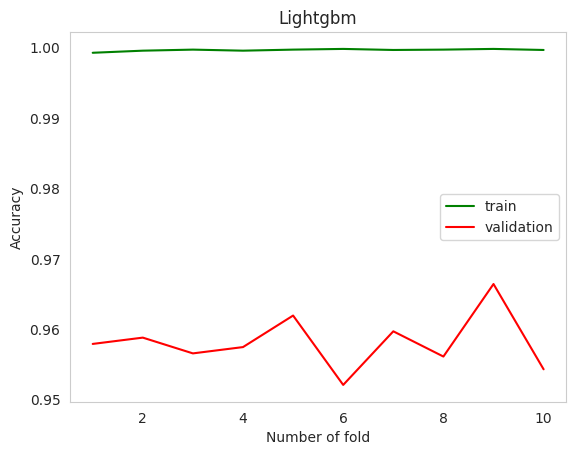

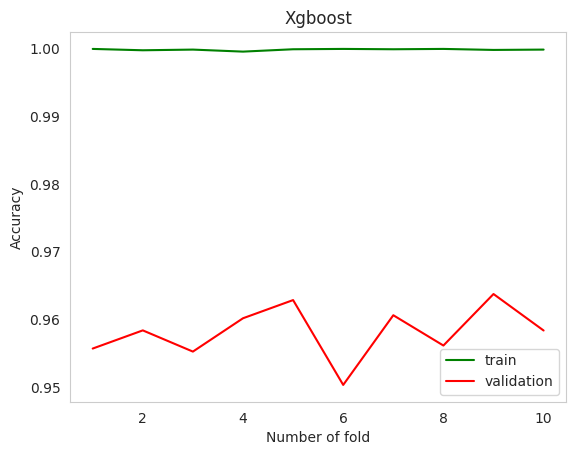

In [46]:
from sklearn.model_selection import KFold, StratifiedKFold
import matplotlib.pyplot as plt

kf = StratifiedKFold(n_splits=10)
acc_train = []
acc_val = []
i = 0

for model in models:
  for train_index, val_index in kf.split(X_train,Y_train):

    X_train_val, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
    Y_train_val, Y_val = Y_train.iloc[train_index], Y_train.iloc[val_index]
    model.fit(X_train_val, Y_train_val)
    Y_train_pred = model.predict(X_train_val)
    Y_val_pred = model.predict(X_val)
    acc_train.append(metrics.accuracy_score(Y_train_val, Y_train_pred))
    acc_val.append(metrics.accuracy_score(Y_val, Y_val_pred))
  folds = range(1, kf.get_n_splits() + 1)
  plt.plot(folds, acc_train, color='green', label='train')
  plt.plot(folds, acc_val, color='red', label='validation')
  plt.title(names[i])
  i += 1
  plt.legend()
  plt.grid()
  plt.xlabel('Number of fold')
  plt.ylabel('Accuracy')
  plt.show()
  acc_train.clear()
  acc_val.clear()

KNN, Extra Tree, Random Forest, Decision Tree, Lightgbm and Xgboost are overfitting. Logistic Regression, Gaussian and SVM are good fit.

## Modelling and fitting analysis for modern machine learning

In [47]:
from keras.models import Sequential
from keras.layers import Dense

in_dim = len(data.columns)-1

nn_model = Sequential()
nn_model.add(Dense(64, activation='relu', input_dim = in_dim))
nn_model.add(Dense(64, activation='relu'))
nn_model.add(Dense(64, activation='relu'))
nn_model.add(Dense(7, activation='softmax'))
nn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#hist = model.fit(X_train, to_categorical(Y_train), epochs=40, batch_size=10)

#for i, m in enumerate(model.metrics_names):
#    print("\n%s: %.3f"% (m, scores[i]))

In [48]:
no_epochs = 30
nn = nn_model.fit(X_train, to_categorical(Y_train),
          batch_size= 10,
          epochs= no_epochs,
          verbose= 1,
          validation_split = 0.2)


Epoch 1/30
1788/1788 [==============================] - 6s 3ms/step - loss: 0.3969 - accuracy: 0.8594 - val_loss: 0.2396 - val_accuracy: 0.9179
Epoch 2/30
1788/1788 [==============================] - 6s 3ms/step - loss: 0.2381 - accuracy: 0.9124 - val_loss: 0.2718 - val_accuracy: 0.9056
Epoch 3/30
1788/1788 [==============================] - 5s 3ms/step - loss: 0.2198 - accuracy: 0.9208 - val_loss: 0.2146 - val_accuracy: 0.9259
Epoch 4/30
1788/1788 [==============================] - 5s 3ms/step - loss: 0.2132 - accuracy: 0.9229 - val_loss: 0.2224 - val_accuracy: 0.9203
Epoch 5/30
1788/1788 [==============================] - 6s 3ms/step - loss: 0.2064 - accuracy: 0.9245 - val_loss: 0.2052 - val_accuracy: 0.9252
Epoch 6/30
1788/1788 [==============================] - 5s 3ms/step - loss: 0.2034 - accuracy: 0.9251 - val_loss: 0.2122 - val_accuracy: 0.9228
Epoch 7/30
1788/1788 [==============================] - 6s 4ms/step - loss: 0.2001 - accuracy: 0.9264 - val_loss: 0.1737 - val_accuracy:

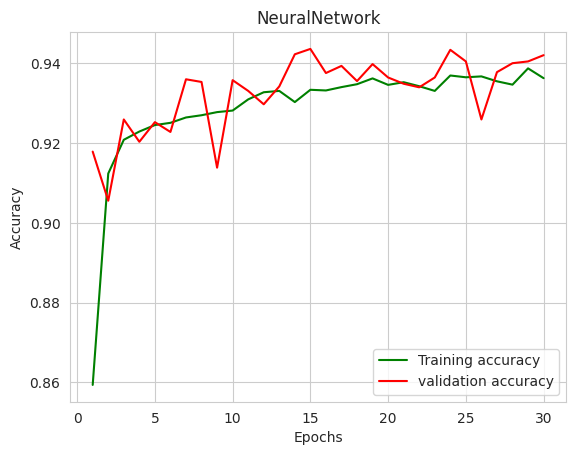

In [49]:
acc_train = nn.history['accuracy']
acc_val = nn.history['val_accuracy']
epochs = range(1,no_epochs + 1)
plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'r', label='validation accuracy')
plt.title('NeuralNetwork')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Neural network is good fit.

In [50]:
fit = pd.DataFrame({'Model':['LogisticRegression','SVM','GuassianNaiveBayes','K-NN','ExtraTree','RandomForest','DecisionTree','Lightgbm','Xgboost', 'NeuralNetwork'],
                    'Fitting': ['Well','Well','Well','Over','Over','Over','Over','Over','Over','Well']})
fit

,Model,Fitting
0,LogisticRegression,Well
1,SVM,Well
2,GuassianNaiveBayes,Well
3,K-NN,Over
4,ExtraTree,Over
5,RandomForest,Over
6,DecisionTree,Over
7,Lightgbm,Over
8,Xgboost,Over
9,NeuralNetwork,Well


# Evaluation

In [51]:

accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []

for name in models:
    model = name
    Y_pred = model.predict(X_test)
    accuracy = metrics.accuracy_score(Y_test, Y_pred)
    precision =  metrics.precision_score(Y_test, Y_pred, average = "macro")
    recall = metrics.recall_score(Y_test, Y_pred, average = "macro")
    f1_score = metrics.f1_score(Y_test, Y_pred, average = "macro")

    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_score_list.append(f1_score)

In [52]:
evaluation_classic = pd.DataFrame({'Model': names,
                           'Accuracy': accuracy_list,
                           'Precision' : precision_list,
                           'Recall' : recall_list,
                           'F1 Score': f1_score_list
                           })


In [53]:
Y_pred_nn = np.argmax((nn_model.predict(X_test)), axis=1)

78/78 [==============================] - 0s 2ms/step


In [54]:
accuracy = metrics.accuracy_score(Y_test,Y_pred_nn)
precision =  metrics.precision_score(Y_test, Y_pred_nn , average = "macro")
recall = metrics.recall_score(Y_test, Y_pred_nn, average = "macro")
f1_score = metrics.f1_score(Y_test, Y_pred_nn, average = "macro")

new_row = {'Model':'Neural Network', 'Accuracy':accuracy, 'Precision':precision, 'Recall':recall, 'F1 Score': f1_score}
evaluation_all = evaluation_classic.append(new_row, ignore_index=True)
evaluation_all['Fitting'] = fit['Fitting']

In [55]:
evaluation_all

,Model,Accuracy,Precision,Recall,F1 Score,Fitting
0,LogisticRegression,0.938381,0.938877,0.938663,0.938519,Well
1,SVM,0.946436,0.946641,0.946573,0.946492,Well
2,GuassianNaiveBayes,0.915022,0.916754,0.916054,0.915256,Well
3,K-NN,0.955296,0.955459,0.955458,0.955337,Over
4,ExtraTree,0.935965,0.935977,0.936412,0.935966,Over
5,RandomForest,0.962143,0.962113,0.962163,0.962115,Over
6,DecisionTree,0.939992,0.939794,0.939992,0.939860,Over
7,Lightgbm,0.965767,0.965948,0.965824,0.965829,Over
8,Xgboost,0.963351,0.963508,0.963407,0.963389,Over
9,Neural Network,0.943214,0.944123,0.943389,0.943265,Well


In [56]:
evaluation_all.loc[evaluation_all['Fitting'] == 'Well']

,Model,Accuracy,Precision,Recall,F1 Score,Fitting
0,LogisticRegression,0.938381,0.938877,0.938663,0.938519,Well
1,SVM,0.946436,0.946641,0.946573,0.946492,Well
2,GuassianNaiveBayes,0.915022,0.916754,0.916054,0.915256,Well
9,Neural Network,0.943214,0.944123,0.943389,0.943265,Well


In [57]:
colors = []
for fit_value in evaluation_all['Fitting']:
    if fit_value == 'Well':
        colors.append('b')
    else:
        colors.append('r')

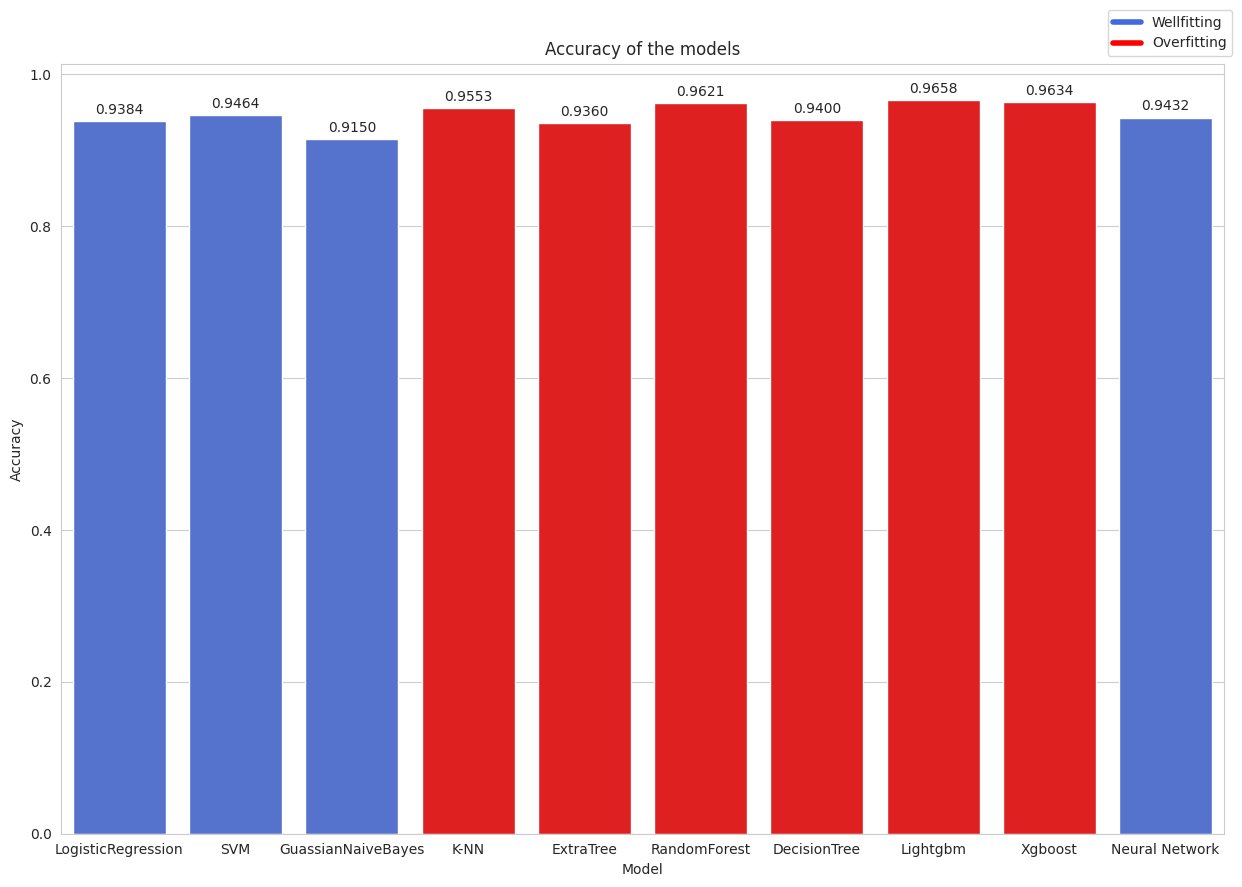

In [58]:
from matplotlib.lines import Line2D
plt.figure(figsize=(15, 10))
#sns.color_palette("ch:start=.2,rot=.3", as_cmap=True)
colors = []
for fit_value in evaluation_all['Fitting']:
    if fit_value == 'Well':
        colors.append('royalblue')
    else:
        colors.append('red')


ax = sns.barplot(x="Model", y="Accuracy", data=evaluation_all, palette = colors )

plt.title('Accuracy of the models')

def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.4f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center")
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.4f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

show_values(ax)
legend_elements = [Line2D([0], [0], color='royalblue', lw=4, label='Wellfitting'),
                   Line2D([0], [0], color='red', lw=4, label='Overfitting')]

#plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
ax.legend(handles=legend_elements, loc=(0.9,1.01))
plt.show()

All the models achieve accuracy higher than 90% which means all models is good. However, some models are overfitting such as KNN, ExtraTree, RandomForest, DecisionTree, Lightgbm and Xgboost. The remaining good fitted model is Logistic regression, SVM, GaussianNaiveBayes and Neural Network. Hyperparameter tuning for these 4 models are computationally expensive. Therefore, We select only 1 best model and tune the model to improve the accuracy further. Among these models, SVM shows the highest accuracy. Therefore, SVM will be tuned.

## Hyperparameter tunning for SVM

In [59]:
from sklearn.model_selection import GridSearchCV

svm = SVC()

param_grid = {'kernel': ('sigmoid', 'rbf','poly') ,
              'C':[1,5, 10],
              'gamma': ('scale', 'auto')}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 2)


grid.fit(X_train, Y_train)

print(grid.best_params_)
print(grid.best_estimator_.get_params())

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ...................C=1, gamma=scale, kernel=sigmoid; total time=  47.5s
[CV] END ...................C=1, gamma=scale, kernel=sigmoid; total time=  49.1s
[CV] END ...................C=1, gamma=scale, kernel=sigmoid; total time=  46.9s
[CV] END ...................C=1, gamma=scale, kernel=sigmoid; total time=  48.2s
[CV] END ...................C=1, gamma=scale, kernel=sigmoid; total time=  47.4s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   2.9s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   4.4s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   2.9s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   2.8s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   2.9s
[CV] END ......................C=1, gamma=scale, kernel=poly; total time=   2.4s
[CV] END ......................C=1, gamma=scale,

Best parameter is C :10, gamma: scale, kernel:poly.

In [60]:
grid_svc = grid.predict(X_test)

acc_hyper = metrics.accuracy_score(Y_test, grid_svc)
print(acc_hyper)
print()

0.9540877970197342



In [61]:
best_model = SVC(C= 10, gamma= 'scale', kernel= 'poly')
best_model.fit(X_train,Y_train)
Y_pred = best_model.predict(X_test)
accuracy = metrics.accuracy_score(Y_test,Y_pred)
precision =  metrics.precision_score(Y_test, Y_pred , average = "macro")
recall = metrics.recall_score(Y_test, Y_pred, average = "macro")
f1_score = metrics.f1_score(Y_test, Y_pred, average = "macro")


In [62]:
evaluation_tuning = pd.DataFrame({'Model': ['SVM'],
                           'Accuracy': accuracy,
                           'Precision': precision,
                           'Recall': recall,
                           'F1 Score': f1_score })

evaluation_tuning

,Model,Accuracy,Precision,Recall,F1 Score
0,SVM,0.954088,0.954339,0.954158,0.954128


Accuracy increase from 0.9464 to 0.9541. Not have significant different but still good for short execution time for hyperparameter tuning.

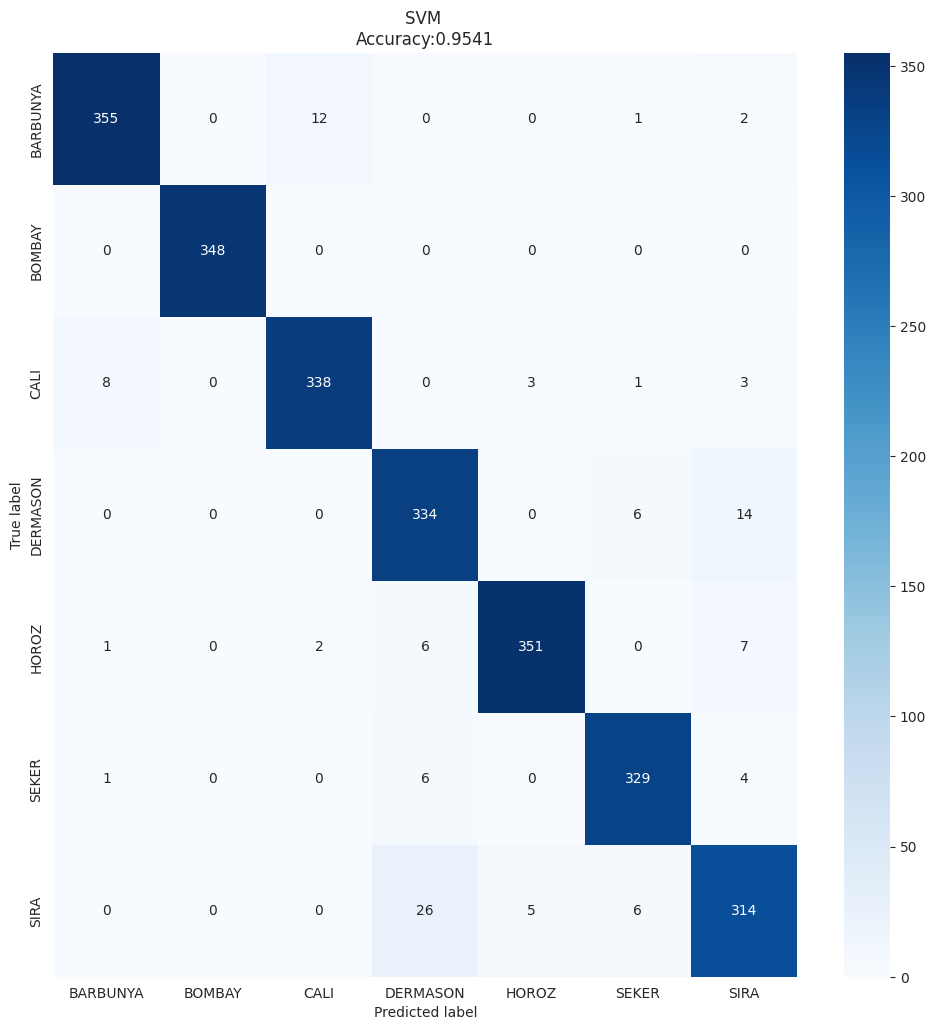

In [63]:
cm = confusion_matrix(Y_test, Y_pred)

cm_df = pd.DataFrame(cm, index = ['BARBUNYA', 'BOMBAY','CALI','DERMASON','HOROZ','SEKER','SIRA' ],
                     columns =['BARBUNYA', 'BOMBAY','CALI','DERMASON','HOROZ','SEKER','SIRA' ])

plt.figure(figsize=(12,12))
sns.heatmap(cm_df, cmap = "Blues", annot=True, fmt='.4g')
plt.title('SVM \nAccuracy:{0:.4f}'.format(accuracy))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [64]:
cm_df

,BARBUNYA,BOMBAY,CALI,DERMASON,HOROZ,SEKER,SIRA
BARBUNYA,355,0,12,0,0,1,2
BOMBAY,0,348,0,0,0,0,0
CALI,8,0,338,0,3,1,3
DERMASON,0,0,0,334,0,6,14
HOROZ,1,0,2,6,351,0,7
SEKER,1,0,0,6,0,329,4
SIRA,0,0,0,26,5,6,314


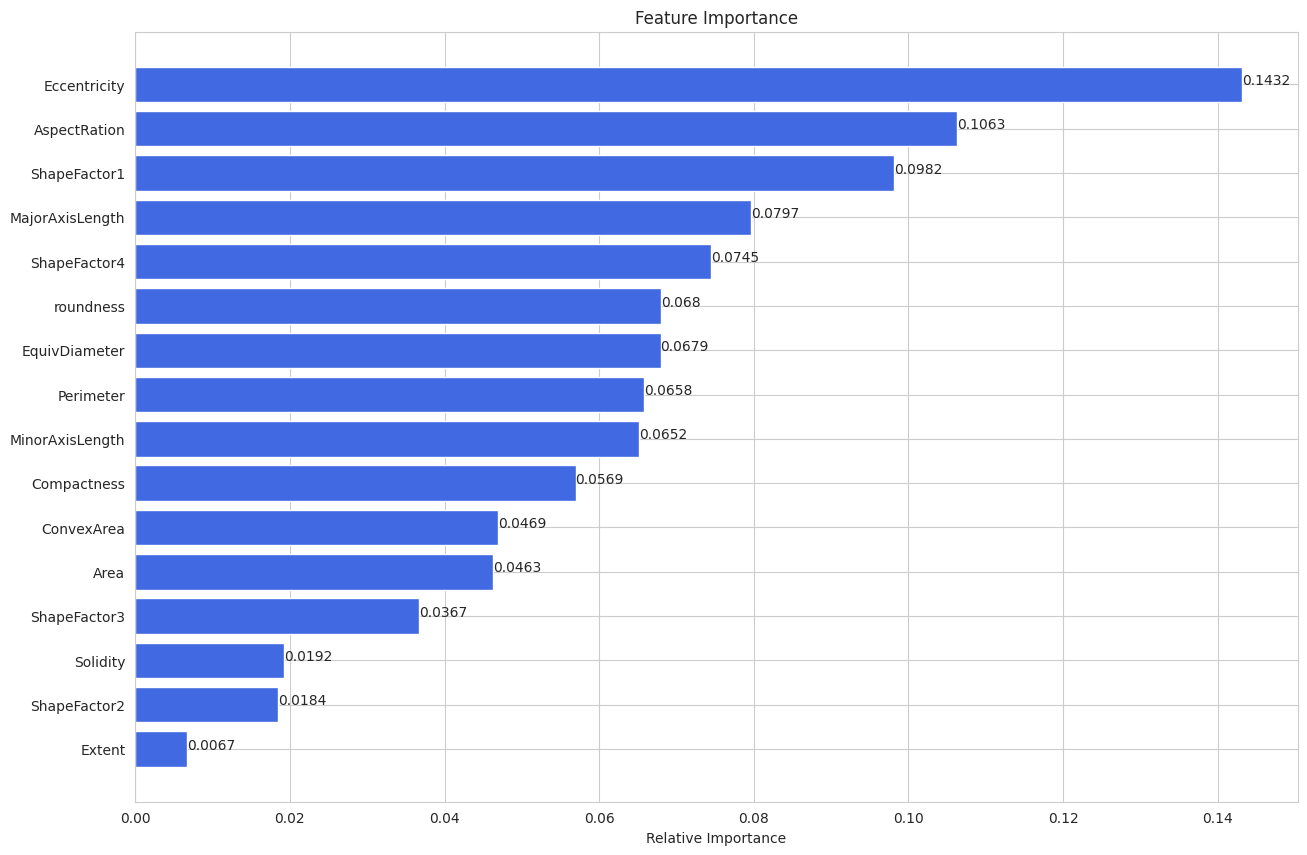

In [65]:
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt

perm_importance = permutation_importance(best_model, X, Y)

# Making the sum of feature importance being equal to 1.0,
# so feature importance can be understood as percentage
perm_importance_normalized = perm_importance.importances_mean/perm_importance.importances_mean.sum()

# Feature's name (considering your X a DataFrame)
feature_names = X.columns
features = np.array(feature_names)

# Sort to plot in order of importance
sorted_idx = perm_importance_normalized.argsort()

# Plotting
plt.figure(figsize=(15,10))
plt.title('Feature Importance')
plt.barh(features[sorted_idx], perm_importance_normalized[sorted_idx], color='royalblue', align='center')
plt.xlabel('Relative Importance')
plt.xticks()
plt.yticks()

for index, value in enumerate(perm_importance_normalized[sorted_idx]):
    plt.text(value, index,
             str(round(value,4)))

plt.show()

From the best models, the feature importance is obtained. In ascending order are Extent, ShapeFactor2, Solidity, ShapeFactor3, Area, ConvexArea, Compactness, MinorAxisLength, Perimeter, EquiveDiameter, roundness,ShapeFactor4, MajorAxisLength, ShapeFactor1, AspectRation and Eccentricity.


# Deployment object

In [66]:
cm_data = []

for i in cm_df.columns:
  for j in cm_df.columns:
    cm_data.append([i, j, cm_df[i][j]])

In [67]:
cm_data

[['BARBUNYA', 'BARBUNYA', 355],
 ['BARBUNYA', 'BOMBAY', 0],
 ['BARBUNYA', 'CALI', 8],
 ['BARBUNYA', 'DERMASON', 0],
 ['BARBUNYA', 'HOROZ', 1],
 ['BARBUNYA', 'SEKER', 1],
 ['BARBUNYA', 'SIRA', 0],
 ['BOMBAY', 'BARBUNYA', 0],
 ['BOMBAY', 'BOMBAY', 348],
 ['BOMBAY', 'CALI', 0],
 ['BOMBAY', 'DERMASON', 0],
 ['BOMBAY', 'HOROZ', 0],
 ['BOMBAY', 'SEKER', 0],
 ['BOMBAY', 'SIRA', 0],
 ['CALI', 'BARBUNYA', 12],
 ['CALI', 'BOMBAY', 0],
 ['CALI', 'CALI', 338],
 ['CALI', 'DERMASON', 0],
 ['CALI', 'HOROZ', 2],
 ['CALI', 'SEKER', 0],
 ['CALI', 'SIRA', 0],
 ['DERMASON', 'BARBUNYA', 0],
 ['DERMASON', 'BOMBAY', 0],
 ['DERMASON', 'CALI', 0],
 ['DERMASON', 'DERMASON', 334],
 ['DERMASON', 'HOROZ', 6],
 ['DERMASON', 'SEKER', 6],
 ['DERMASON', 'SIRA', 26],
 ['HOROZ', 'BARBUNYA', 0],
 ['HOROZ', 'BOMBAY', 0],
 ['HOROZ', 'CALI', 3],
 ['HOROZ', 'DERMASON', 0],
 ['HOROZ', 'HOROZ', 351],
 ['HOROZ', 'SEKER', 0],
 ['HOROZ', 'SIRA', 5],
 ['SEKER', 'BARBUNYA', 1],
 ['SEKER', 'BOMBAY', 0],
 ['SEKER', 'CALI', 1],
 ['SEK

In [68]:
import json

json_cm_data = json.dumps(cm_data, indent=4, default=float)

with open("json_cm_data.json", "w") as outfile:
    outfile.write(json_cm_data)

In [69]:
import json

json_data = json.dumps(corr_data, indent=4)

with open("json_data.json", "w") as outfile:
    outfile.write(json_data)

# Deployment

In [71]:
from google.colab.output import eval_js
print(eval_js("google.colab.kernel.proxyPort(5000)"))

https://lummt9jhow-496ff2e9c6d22116-5000-colab.googleusercontent.com/


In [72]:
from flask import Flask
from flask.templating import render_template
from flask import Flask, flash, request, url_for, redirect

In [73]:
#dummy var
values2 = 0
labels2 = 0
labeling = "Distribution"

var_x = 0
var_y = 0
labeling_scat = "Bivariate"

previous_data_xvar = 'Area'
previous_data_yvar = 'Area'
previous_data_bean = 'DERMASON'
previous_data_parameter = 'Area'

In [ ]:
template_folder = '/content/drive/MyDrive/Dry Bean Classification/template/src/html/'
asset_folder = '/content/drive/MyDrive/Dry Bean Classification/template/src/assets/'
app = Flask(__name__, template_folder = template_folder, static_folder=asset_folder)#, static_url_path=asset_folder)

@app.route("/", methods=['GET', 'POST',])

@app.route("/dashboard.html", methods = ["GET", "POST"])
def analysis():

  values1 = list(count_data)
  labels1 = list(count_data.keys())

  global  labeling_scat, var_x, var_y, labels2, values2, labeling, val, lab, labs, X, Y, labs_scat, previous_data_bean, previous_data_parameter, previous_data_xvar, previous_data_yvar
  global pre_data_xvar, pre_data_yvar, pre_data_bean, pre_data_parameter

  val = values2
  lab = labels2
  labs = labeling

  Xdum = var_x
  Ydum = var_y
  labs_scat = labeling_scat


  pre_data_xvar = previous_data_xvar
  pre_data_yvar = previous_data_yvar
  pre_data_bean = previous_data_bean
  pre_data_parameter = previous_data_parameter



  labels2 = 0
  values2 = 0
  labeling = "Distribution"
  labeling_scat = "Bivariate"
  var_x = 0
  var_y = 0

  previous_data_xvar = 'Area'
  previous_data_yvar = 'Area'
  previous_data_bean = 'DERMASON'
  previous_data_parameter = 'Area'

  if request.method == "POST":

    if request.form['submit'] == 'formuni':


      bean_type =  request.form.get("beans")
      bean_feature = request.form.get("features")

      previous_data_bean = bean_type
      previous_data_parameter = bean_feature

      pre_data_bean = previous_data_bean
      pre_data_parameter = previous_data_parameter

      previous_data_xvar = pre_data_xvar
      previous_data_yvar = pre_data_yvar


      var_x = Xdum
      var_y = Ydum
      labeling_scat = labs_scat

      if (bean_type == "ALL"):
        mini_val = data_deploy[bean_feature].min()
        maxi_val = data_deploy[bean_feature].max()
        data_select = pd.cut(data_deploy[bean_feature],  bins = np.linspace(mini_val, maxi_val, 50) ).value_counts().sort_index()
        labels2 = list(data_select.keys().astype(str))
        values2 = list(data_select)
        labeling = "Distribution of " + bean_feature + " for " + bean_type + " Beans"
        labeling = labeling.title()

        val = labels2
        lab = values2
        labs = labeling

      else:
        mini_val = data_deploy[data_deploy["Class"] == bean_type][bean_feature].min()
        maxi_val = data_deploy[data_deploy["Class"] == bean_type][bean_feature].max()
        data_select = pd.cut(data_deploy[data_deploy["Class"] == bean_type][bean_feature],  bins = np.linspace(mini_val, maxi_val, 50)).value_counts().sort_index()
        labels2 = list(data_select.keys().astype(str))
        values2 = list(data_select)
        labeling = "Distribution of " + bean_feature + " for " + bean_type
        labeling = labeling.title()

        val = values2
        lab = labels2
        labs = labeling

    if request.form['submit'] == 'formbi':

      values2 = val
      labels2 = lab
      labeling = labs

      varx = request.form.get("Xvariable")
      vary = request.form.get("Yvariable")

      previous_data_bean = pre_data_bean
      previous_data_parameter = pre_data_parameter

      previous_data_xvar = varx
      previous_data_yvar = vary

      pre_data_xvar = previous_data_xvar
      pre_data_yvar = previous_data_yvar

      labeling_scat = " " + varx + " against " + vary + " "

      var_x = list(data_deploy[varx])
      var_y = list(data_deploy[vary])

      X = var_x
      Y = var_y
      labs_cat = labeling_scat


  return render_template("dashboard.html", labels1 = labels1, values1 = values1, labeling_scat = labeling_scat, var_x = var_x , var_y = var_y, labels2 = labels2, values2 = values2, labeling = labeling, previous_data_xvar = previous_data_xvar, previous_data_yvar = previous_data_yvar, previous_data_bean = previous_data_bean, previous_data_parameter = previous_data_parameter)#, varx_ = var_x, vary_ = var_y)#, json_data_input = '..//content/json_data.json')

@app.route("/tools.html", methods = ["GET", "POST"])
def predict():

  labeling_Imp =  'Features Importances'
  labels_Imp = list(features)
  values_Imp = list(perm_importance_normalized)

  prediction_output = ""

  title_model = 'Model: SVM,  Accuracy:{0:.4f}'.format(accuracy)

  if request.method == "POST":

    int_features = [float(x) for x in request.form.values()]


    final_features = np.array([int_features])
    scale_features = scaler.transform(final_features)

    print(final_features)
    prediction = best_model.predict(scale_features)
    print(scale_features)
    print(prediction)
    pred_out = l1.inverse_transform(prediction)[0]
    print(pred_out)
    prediction_output = "The bean type based on input features: " + pred_out


  return render_template("tools.html", labeling = labeling_Imp, labels_Imp = labels_Imp, values_Imp = values_Imp, prediction_output= prediction_output, title_model = title_model)

if __name__ == "__main__":
  app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [02/Mar/2024 09:30:56] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [02/Mar/2024 09:30:57] "GET /assets/css/styles.min.css HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [02/Mar/2024 09:30:57] "GET /assets/js/sidebarmenu.js HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [02/Mar/2024 09:30:57] "GET /assets/images/logos/Bean-Ana.svg HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [02/Mar/2024 09:30:57] "GET /assets/libs/jquery/dist/jquery.min.js HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [02/Mar/2024 09:30:57] "GET /assets/js/app.min.js HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [02/Mar/2024 09:30:57] "GET /assets/js/dashboard.js HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [02/Mar/2024 09:30:57] "GET /assets/libs/bootstrap/dist/js/bootstrap.bundle.min.js HTTP/1.

[[3.88910000e+04 7.91343000e+02 3.19499996e+02 1.56869619e+02
  2.03672300e+00 8.71168000e-01 3.96510000e+04 2.22525412e+02
  6.50025000e-01 9.80833000e-01 7.80422000e-01 6.96480000e-01
  8.21500000e-03 1.19200000e-03 4.85085000e-01 9.87983000e-01]]
[[0.07886984 0.18252827 0.24474855 0.10174239 0.7199569  0.94186771
  0.07818961 0.15015206 0.3046523  0.81646224 0.58036881 0.16123166
  0.70857244 0.20247368 0.13242848 0.77424342]]
[4]
HOROZ


INFO:werkzeug:127.0.0.1 - - [02/Mar/2024 09:57:55] "GET /assets/libs/simplebar/dist/simplebar.js HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [02/Mar/2024 09:57:55] "GET /assets/js/app.min.js HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [02/Mar/2024 09:57:55] "GET /assets/images/logos/Bean-Ana.svg HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [02/Mar/2024 09:57:55] "GET /assets/js/sidebarmenu.js HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [02/Mar/2024 09:57:55] "GET /assets/libs/jquery/dist/jquery.min.js HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [02/Mar/2024 09:57:55] "GET /assets/css/styles.min.css HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [02/Mar/2024 09:57:56] "GET /assets/libs/bootstrap/dist/js/bootstrap.bundle.min.js HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [02/Mar/2024 09:57:57] "GET /assets/libs/simplebar/dist/simplebar.css HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [02/Mar/2024 09:57:57] "GET /assets/css/icons/tabler-icons/tabler-icons.css HTTP/1.1" 200 -
INFO:werkzeug:127.